In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
pd.set_option('display.max_row', 14)
pd.set_option('display.max_column', 14)

In [85]:
data = pd.read_excel('Manoeuvers_Ath.xlsx')

In [86]:
data.head()

,Date,Maneuver type,Delta-t,Delta Inc X,Delta Inc Y,Delta Ecc X,Delta Ecc Y,Delta Energy,Delta Energy Previous,Delta Energy Next,Delta Moment,Delta Out-of-plane,Delta Along-track,Delta Along-track avg
0,24140.749659,0,1.224519,0.000010,0.000258,-0.000058,0.000132,-46.793223,0.000000,99.526227,0.000517,-4628.698901,-28711.657464,0.000000
1,24141.519689,1,0.770030,-0.000025,-0.000213,0.000075,-0.000106,99.526227,-46.793223,-4.871059,0.000429,35293.385259,2776.854666,15744.256065
2,24142.516965,0,0.997276,-0.000015,0.000030,-0.000012,-0.000009,-4.871059,99.526227,-16.184467,0.000067,15963.393632,-10739.880071,1838.528849
3,24144.511512,0,1.994546,-0.000018,0.000027,0.000005,0.000001,-16.184467,-4.871059,-101.914365,0.000065,18457.947107,-8576.802672,5298.810851
4,24145.237001,0,0.725489,0.000026,-0.000008,0.000027,0.000033,-101.914365,-16.184467,84.064344,0.000054,-7575.844344,-30462.847067,-13084.512230


# 1. Exploratory Data Analysis

## Objectif :
- Compréhension des données
- Développer une premiere stratégie de modélisation 

## Checklist de base
#### Analyse de Forme :
- **variable target** : Maneuver type	
- **lignes et colonnes** : (1559, 14)
- **types de variables** : qualitatives : 13, quantitatives : 1
- **Analyse des valeurs manquantes** :
    - Aucune valeur manquante

#### Analyse de Fond :
- **Visualisation de la target** :
      Maneuver type:
     - **Value = 0, on a 1267 acune manoeuvre**
     - **Value = 1, on a 195 manoeuvres East/West**
     - **Value = 2, 97   manoeuvres South/North** 
    
    
    
- **Signification des variables** :
    -  variables continues standardisées, skewed (asymétriques), Delta Ecc
    

- **Relation Variables / Target** :
   
    - target/Delta-t : 
    
    - target / Delta Energy : 
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :
    - Delta Energy / Maneuver type :  corrélation entre les deux
    - Deta Moment / Maneuver type : 


### hypotheses nulle (H0): 

- 

    

In [12]:
df = data.copy()

In [13]:
#Détection du nombre de lignes et colonnes
df.shape

(1559, 14)

In [14]:
#Détection du type de variable
df.dtypes.value_counts()

float64    13
int64       1
dtype: int64

In [85]:
#Toujours dans la phase d'analyse on affiche notre dataset dans une image
df.isna()

,Date,Maneuver type,Delta-t,Delta Inc X,Delta Inc Y,Delta Ecc X,Delta Ecc Y,Delta Energy,Delta Energy Previous,Delta Energy Next,Delta Moment,Delta Out-of-plane,Delta Along-track,Delta Along-track avg
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1555,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1556,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1557,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

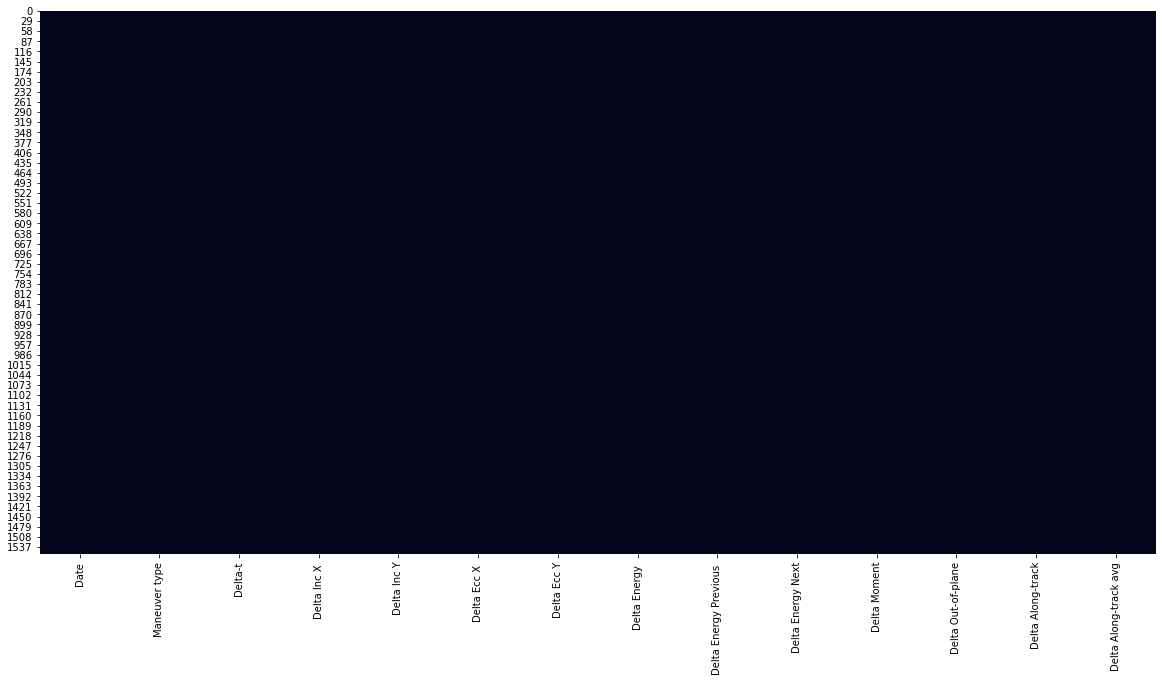

In [86]:
#Cette figure illustre parfaitement le fait que notre dataset n'a aucune valeur manquante
#Ce qui est une très bonne nouvelle hiihi ^^

plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [15]:
#Suppression de  Delta Out-of-plane, Delta Along-track et Delta Along-track avg
#Car pas important et données de calcul de ces valeurs manquantes dans le word

df = df.drop('Delta Out-of-plane', axis=1)
df = df.drop('Delta Along-track', axis=1)
df = df.drop('Delta Along-track avg', axis=1)


In [16]:
df.head()

,Date,Maneuver type,Delta-t,Delta Inc X,Delta Inc Y,Delta Ecc X,Delta Ecc Y,Delta Energy,Delta Energy Previous,Delta Energy Next,Delta Moment
0,24140.749659,0,1.224519,0.000010,0.000258,-0.000058,0.000132,-46.793223,0.000000,99.526227,0.000517
1,24141.519689,1,0.770030,-0.000025,-0.000213,0.000075,-0.000106,99.526227,-46.793223,-4.871059,0.000429
2,24142.516965,0,0.997276,-0.000015,0.000030,-0.000012,-0.000009,-4.871059,99.526227,-16.184467,0.000067
3,24144.511512,0,1.994546,-0.000018,0.000027,0.000005,0.000001,-16.184467,-4.871059,-101.914365,0.000065
4,24145.237001,0,0.725489,0.000026,-0.000008,0.000027,0.000033,-101.914365,-16.184467,84.064344,0.000054


### Examen de la colonne target

In [17]:
df['Maneuver type'].value_counts()

0    1267
1     195
2      97
Name: Maneuver type, dtype: int64

### histogrames des variables continues 

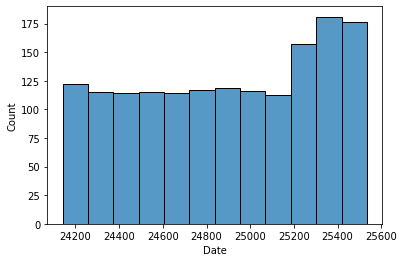

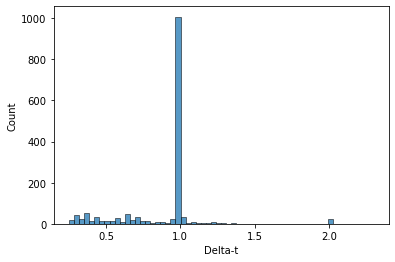

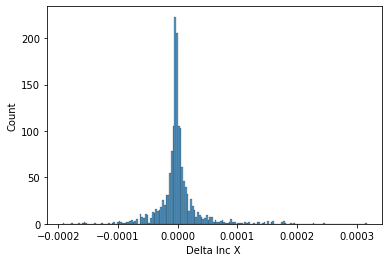

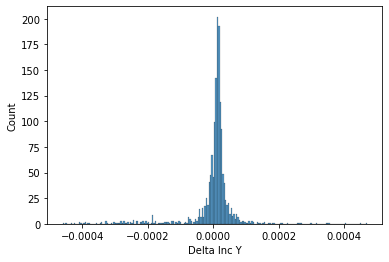

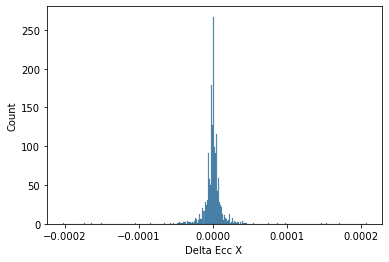

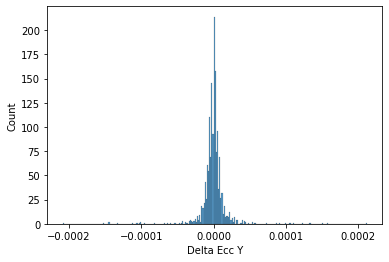

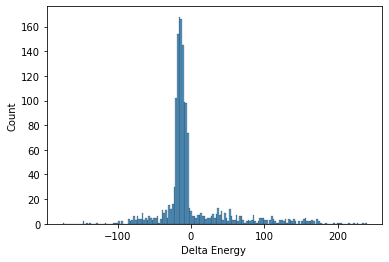

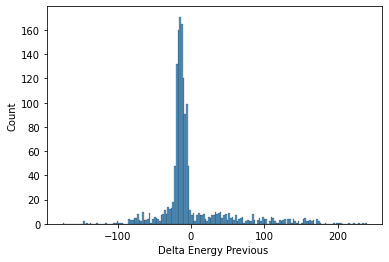

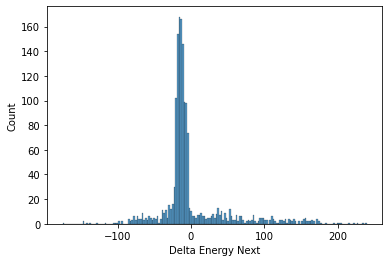

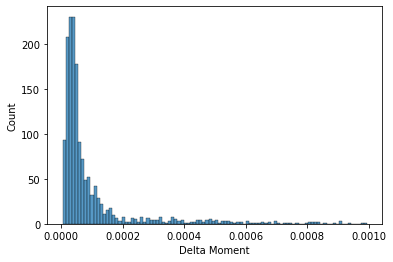

In [110]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.histplot(df[col])
    

## Relation Target / Variables
### Création de sous-ensembles East/West, South/North et None

In [114]:
eastW_df = df[df['Maneuver type'] == 1]

In [117]:
southN_df = df[df['Maneuver type'] == 2]

In [118]:
none_df = df[df['Maneuver type'] == 0]

### Relation Target / Delta-t

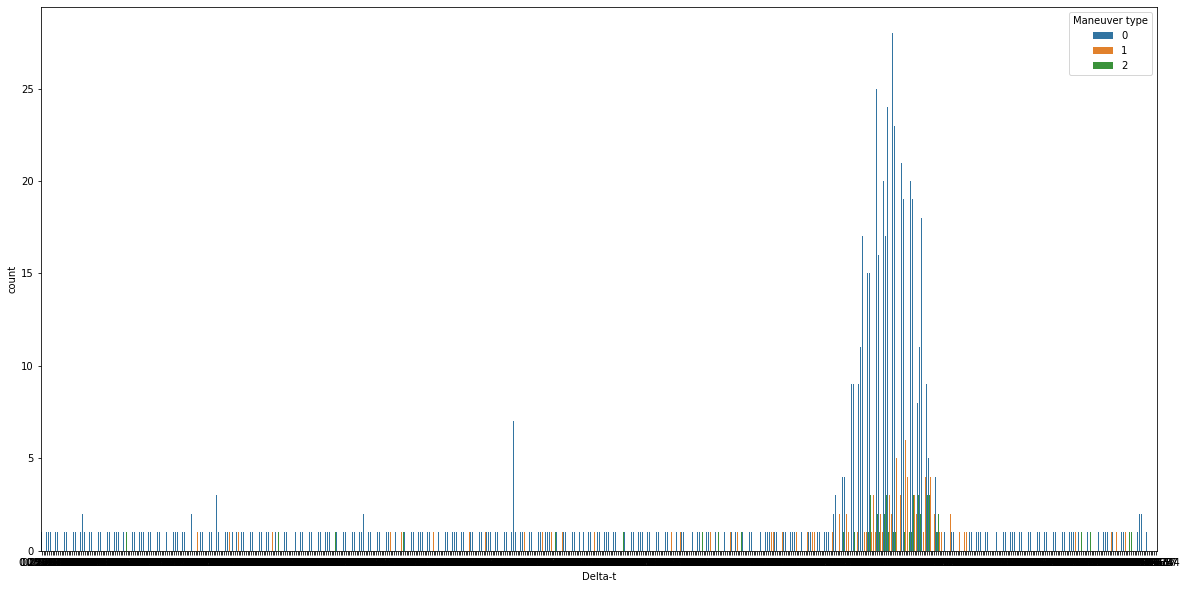

In [150]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Delta-t', hue='Maneuver type', data=df)
plt.show()

### Relation Target / Delta-Energy

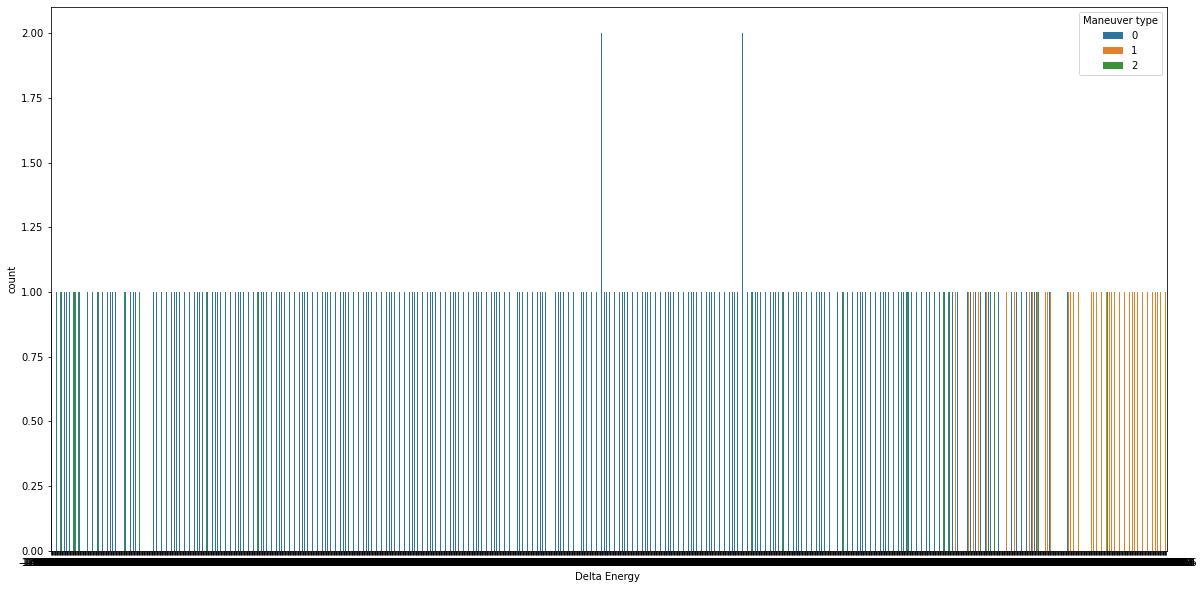

In [148]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Delta Energy ', hue='Maneuver type', data=df)
plt.show()

### Relation Target / Delta Moment

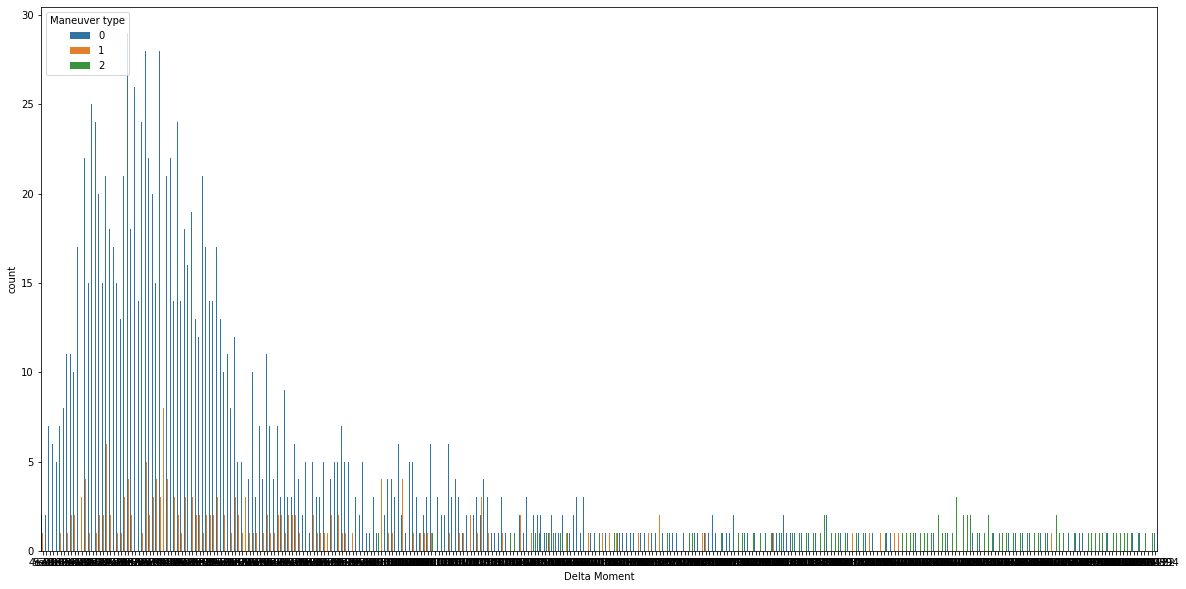

In [147]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Delta Moment', hue='Maneuver type', data=df)
plt.show()

## Analyse un peu plus Avancée
### Relation Variables / Variables

## Relation Ecc x / Delta Energy

In [164]:

df.corr()['Delta Energy '].sort_values()

Delta Energy Next        -0.167058
Delta Energy Previous    -0.167039
Delta Inc X              -0.061107
Delta Moment             -0.053924
Delta Ecc Y              -0.005366
Date                     -0.001923
Delta-t                   0.006948
Delta Ecc X               0.011861
Delta Inc Y               0.097566
Maneuver type             0.352029
Delta Energy              1.000000
Name: Delta Energy , dtype: float64

In [165]:

df.corr()['Delta Moment'].sort_values()

Delta Inc Y              -0.504090
Date                     -0.102756
Delta Energy Previous    -0.062981
Delta Energy             -0.053924
Delta Ecc X              -0.012610
Delta Energy Next        -0.008701
Delta Ecc Y               0.012006
Delta-t                   0.017220
Delta Inc X               0.270260
Maneuver type             0.563152
Delta Moment              1.000000
Name: Delta Moment, dtype: float64

# PRE-PROCESSING

In [51]:
df = data.copy()

In [52]:
df.head()
df.columns

Index(['Date', 'Maneuver type', 'Delta-t', 'Delta Inc X ', 'Delta Inc Y',
       'Delta Ecc X ', 'Delta Ecc Y', 'Delta Energy ',
       'Delta Energy Previous ', 'Delta Energy Next', 'Delta Moment',
       'Delta Out-of-plane', 'Delta Along-track', 'Delta Along-track avg'],
      dtype='object')

In [53]:
df = df.drop('Delta Out-of-plane', axis=1)
df = df.drop('Delta Along-track', axis=1)
df = df.drop('Delta Along-track avg', axis=1)
df = df.drop('Date', axis=1)
#df = df.drop('Delta-t', axis=1)
#df = df.drop('Delta Inc X ', axis=1)
#df = df.drop('Delta Ecc X ', axis=1)
#df = df.drop('Delta Ecc Y', axis=1)


In [54]:
df.head()

,Maneuver type,Delta-t,Delta Inc X,Delta Inc Y,Delta Ecc X,Delta Ecc Y,Delta Energy,Delta Energy Previous,Delta Energy Next,Delta Moment
0,0,1.224519,0.000010,0.000258,-0.000058,0.000132,-46.793223,0.000000,99.526227,0.000517
1,1,0.770030,-0.000025,-0.000213,0.000075,-0.000106,99.526227,-46.793223,-4.871059,0.000429
2,0,0.997276,-0.000015,0.000030,-0.000012,-0.000009,-4.871059,99.526227,-16.184467,0.000067
3,0,1.994546,-0.000018,0.000027,0.000005,0.000001,-16.184467,-4.871059,-101.914365,0.000065
4,0,0.725489,0.000026,-0.000008,0.000027,0.000033,-101.914365,-16.184467,84.064344,0.000054


## TrainTest - Nettoyage - Encodage

In [23]:
from sklearn.model_selection import train_test_split

In [174]:
#trainset , test = train_test_splitt()
x = ([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [183]:
X, y = np.arange(10).reshape((5, 2)), range(5)

In [205]:
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

## TrainTest (de 1 a 1000)- Nettoyage - Encodage


In [55]:
#Création de deuxx dataset un dataset pour la validation et un autre pour les tes
trainset, testset = train_test_split(df, test_size=0.361, shuffle=False)

In [56]:
trainset['Maneuver type'].value_counts()


0    786
1    141
2     69
Name: Maneuver type, dtype: int64

In [57]:
trainset.head()

,Maneuver type,Delta-t,Delta Inc X,Delta Inc Y,Delta Ecc X,Delta Ecc Y,Delta Energy,Delta Energy Previous,Delta Energy Next,Delta Moment
0,0,1.224519,0.000010,0.000258,-0.000058,0.000132,-46.793223,0.000000,99.526227,0.000517
1,1,0.770030,-0.000025,-0.000213,0.000075,-0.000106,99.526227,-46.793223,-4.871059,0.000429
2,0,0.997276,-0.000015,0.000030,-0.000012,-0.000009,-4.871059,99.526227,-16.184467,0.000067
3,0,1.994546,-0.000018,0.000027,0.000005,0.000001,-16.184467,-4.871059,-101.914365,0.000065
4,0,0.725489,0.000026,-0.000008,0.000027,0.000033,-101.914365,-16.184467,84.064344,0.000054


In [58]:
testset['Maneuver type'].value_counts()

0    481
1     54
2     28
Name: Maneuver type, dtype: int64

#### Bon je vais rétirer du dataset la valeur 0 pour le cas ou il y'a pas de maneuve 
#### et entrainer le model juste avec 1 et 2  valeurs présentent dans le dataset initial


In [59]:
#def removeValue:
 #   for i in testset['Maneuver type']
  #   if i==0:
   #     testset.
testset.drop( testset[ testset['Maneuver type'] == 0 ].index, inplace=True)    

C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
testset['Maneuver type'].value_counts()

1    54
2    28
Name: Maneuver type, dtype: int64

In [61]:
def preprocessing(df):
    
    #df = feature_engineering(df)
    
    
    X = df.drop('Maneuver type', axis=1)
    y = df['Maneuver type']
    
    print(y.value_counts())
    
    return X, y

In [62]:
X_train, y_train = preprocessing(trainset)

0    786
1    141
2     69
Name: Maneuver type, dtype: int64


In [268]:
#def removeValue:
 #   for i in testset['Maneuver type']
  #   if i==0:
   #     testset.
#trainset.drop( trainset[ trainset['Maneuver type'] == 0 ].index, inplace=True)    

C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [63]:
trainset.drop( trainset[ trainset['Maneuver type'] == 0 ].index, inplace=True)    
X_train, y_train = preprocessing(trainset)

1    141
2     69
Name: Maneuver type, dtype: int64


C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [64]:
testset.drop( testset[ testset['Maneuver type'] == 0 ].index, inplace=True)    
X_test, y_test = preprocessing(testset)

1    54
2    28
Name: Maneuver type, dtype: int64


C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Modellisation

In [69]:
#Implémentation de plusieurs fonctions et choix de celle qui a un recall le plus élévée

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [70]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [71]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [72]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

RandomForest
[[53  1]
 [ 1 27]]
              precision    recall  f1-score   support

           1       0.98      0.98      0.98        54
           2       0.96      0.96      0.96        28

    accuracy                           0.98        82
   macro avg       0.97      0.97      0.97        82
weighted avg       0.98      0.98      0.98        82

AdaBoost
[[53  1]
 [ 2 26]]
              precision    recall  f1-score   support

           1       0.96      0.98      0.97        54
           2       0.96      0.93      0.95        28

    accuracy                           0.96        82
   macro avg       0.96      0.96      0.96        82
weighted avg       0.96      0.96      0.96        82

SVM
[[54  0]
 [ 3 25]]
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        54
           2       1.00      0.89      0.94        28

    accuracy                           0.96        82
   macro avg       0.97      0.95      0.96  

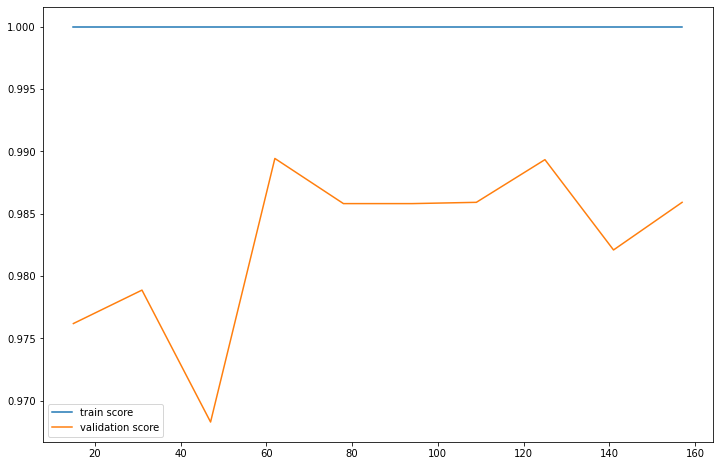

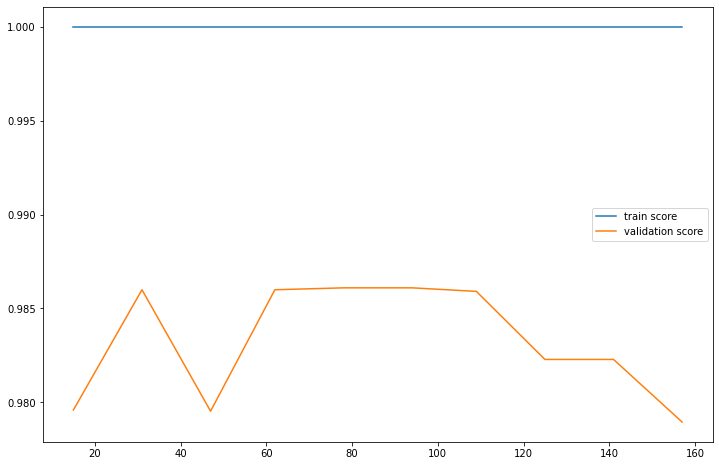

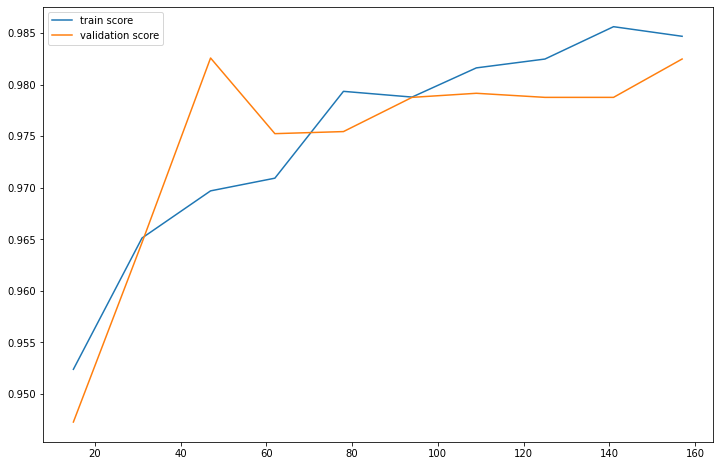

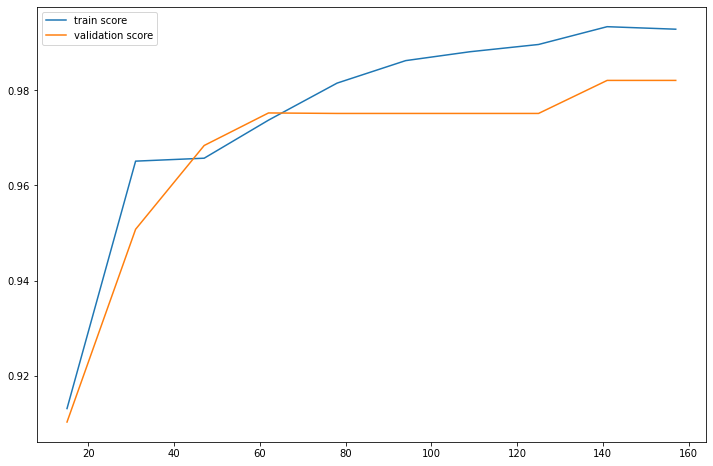

In [73]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

## OPTIMISATION

In [74]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [75]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [77]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(45, 60)}

In [79]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res =

{'svc__gamma': 0.0001, 'svc__C': 1, 'pipeline__selectkbest__k': 47, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           1       0.66      1.00      0.79        54
           2       0.00      0.00      0.00        28

    accuracy                           0.66        82
   macro avg       0.33      0.50      0.40        82
weighted avg       0.43      0.66      0.52        82



C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.98571429 1.                nan 1.         0.99285714 0.99285714
 0.95059524        nan 0.97916667        nan 1.         0.97222222
 0.98571429 1.         0.98571429 0.99285714 0.97916667 0.98571429
 0.97896825 0.99285714 0.98571429 0.99285714 1.                nan
 0.97857143 0.9718254  0.99285714 0.99305556 0.99305556 0.98571429
 0.98571429 0.98571429 1.         1.         0.98571429 0.98571429
 0.99305556 0.97916667 0.99305556 0.97162698]
  warnings.warn(
C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\sklearn

[[54  0]
 [28  0]]
              precision    recall  f1-score   support

           1       0.66      1.00      0.79        54
           2       0.00      0.00      0.00        28

    accuracy                           0.66        82
   macro avg       0.33      0.50      0.40        82
weighted avg       0.43      0.66      0.52        82



C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


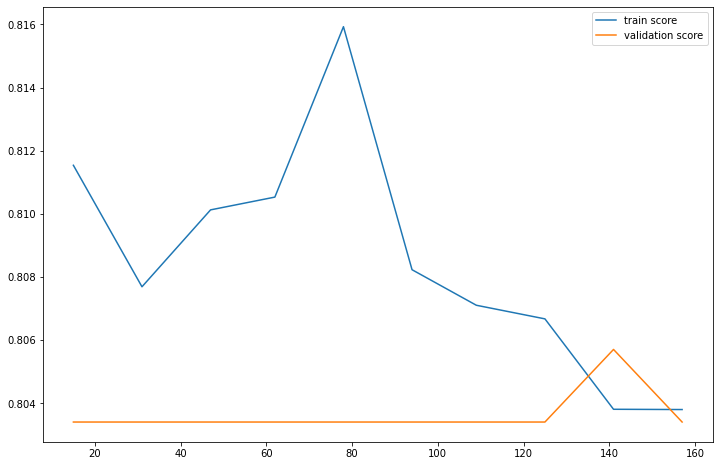

In [80]:
evaluation(grid.best_estimator_)

### Variable les plus importantes dans l'abre de décisions
### On a la var Delta Energy , Delta Inc Y et Delta Moment


<AxesSubplot:>

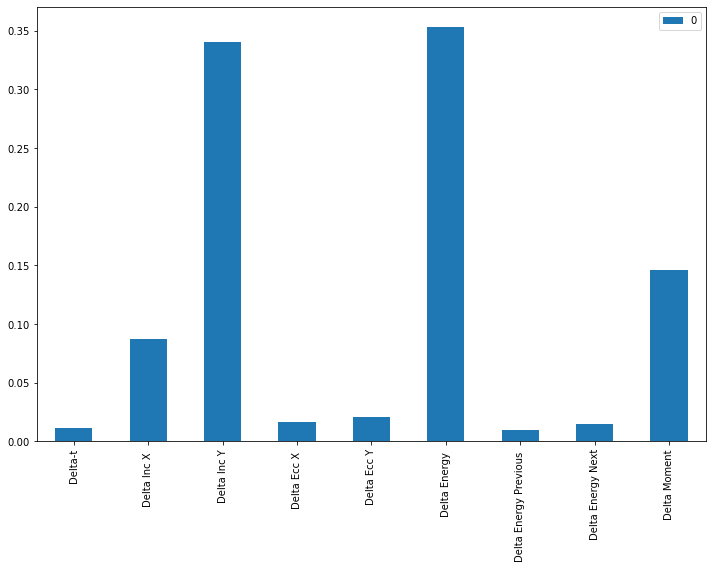

In [68]:
pd.DataFrame(model_1.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

### Suppresiion des variables initules
### Faufra faire le test d'Anova pour une meilleure selection des varibales

In [81]:
df.head()

,Maneuver type,Delta-t,Delta Inc X,Delta Inc Y,Delta Ecc X,Delta Ecc Y,Delta Energy,Delta Energy Previous,Delta Energy Next,Delta Moment
0,0,1.224519,0.000010,0.000258,-0.000058,0.000132,-46.793223,0.000000,99.526227,0.000517
1,1,0.770030,-0.000025,-0.000213,0.000075,-0.000106,99.526227,-46.793223,-4.871059,0.000429
2,0,0.997276,-0.000015,0.000030,-0.000012,-0.000009,-4.871059,99.526227,-16.184467,0.000067
3,0,1.994546,-0.000018,0.000027,0.000005,0.000001,-16.184467,-4.871059,-101.914365,0.000065
4,0,0.725489,0.000026,-0.000008,0.000027,0.000033,-101.914365,-16.184467,84.064344,0.000054


## Precision Recall Curve

In [82]:
from sklearn.metrics import precision_recall_curve